In [225]:
%matplotlib inline

# Aplicação prática do algoritmo de Watershed
### Agora vamos perapar uma imagem e aplicar o algoritmo de Watershed nesta.

1. Primeiramente não esqueçam de intslar os modulos necessarios usando o commando:
```bash
pip3 install -r requirements.txt
```

In [315]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from skimage.filters import rank
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi

from skimage.morphology import disk
import cv2

#### Primeiro temos que ler a imagem original e certificarmos que foi lida corretamente.

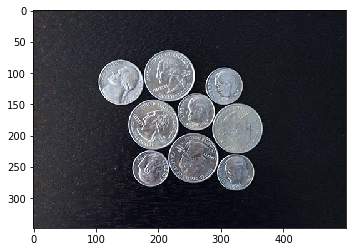

In [316]:
raw_image = cv2.imread('input.jpg')
plt.imshow(raw_image)
plt.show()

#### Agora temos que converter esta imagem para grayscale

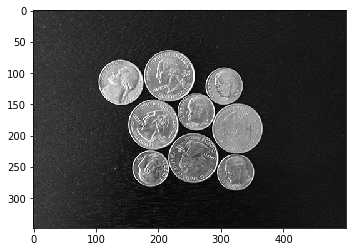

In [317]:
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = plt.get_cmap('gray'))
plt.show()

#### Filtragem

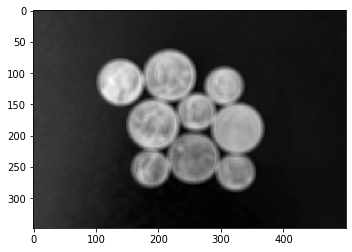

In [318]:
gray_blur = cv2.blur(gray_image, (9,9)) 
plt.imshow(gray_blur, cmap = plt.get_cmap('gray'))
plt.show()

#### Binarizacao

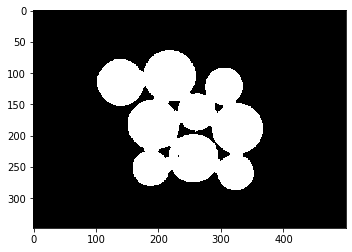

In [319]:
binary_image = cv2.threshold(gray_blur, 200, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(binary_image, cmap = plt.get_cmap('gray'))
plt.show()

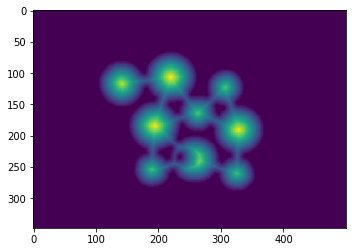

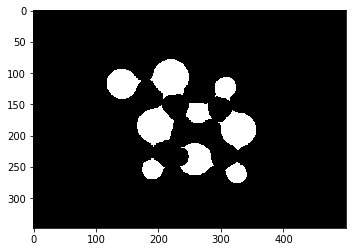

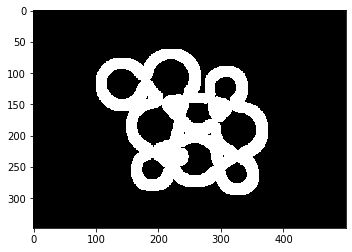

In [320]:
# Criar kernel de iteracao
kernel = np.ones((6,6),np.uint8)
# Erosao + dilatacao para reducao de ruido
opening = cv2.morphologyEx(binary_image,cv2.MORPH_OPEN,kernel, iterations = 2)
# Area definida com certeza como background, usando dilatacao
sure_bg = cv2.dilate(opening,kernel,iterations=2)

# Transformada de distancia a qual calcula distancia euclidiana 
# Casos onde objetos nao toquem nao é necessario a transformada de distancia apeas erosao
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) #distancia de cada pixel ateh pixel de valor 0 mais perto
ret, sure_fg = cv2.threshold(dist_transform, 0.32*dist_transform.max(),255,cv2.THRESH_BINARY) # src thresh maxVal type
# if pixel(x,y) > 0.32*dist_max -> pixel(x,y) = 255
# pixel(x,y) = distancia do ponto preto(borda) mais perto
# ou seja pixel = 255(branco) se distancia ate borda > 0.1* raio maior circulo

sure_fg = np.uint8(sure_fg)
# Areas em que nao eh possivel distinguir fundo do objetos ou onde ha sobreposicao
# Vamos deixar para o watershed resolver isso
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(dist_transform)
plt.show()
plt.imshow(sure_fg, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(unknown, cmap=plt.get_cmap('gray'))
plt.show()

#### Achar marcadores

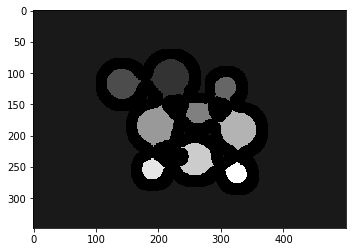

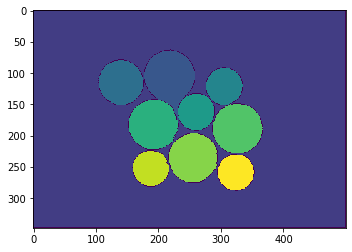

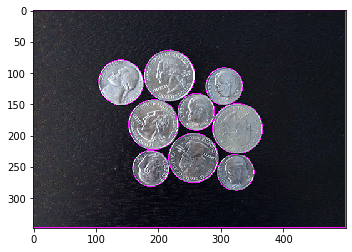

In [327]:

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
plt.imshow(markers, cmap=plt.get_cmap('gray'))
plt.show()

output = cv2.watershed(raw_image, markers)
raw_image[output == -1] = [255,20,255]
plt.imshow(output)
plt.show()
plt.imshow(raw_image)
plt.show()
